# TWITTER SENTIMENTAL ANALYSIS
# Problem Number 30

Sentimental Analysis: 
Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. 
Sentiment analysis is helpful for an organization to know about the feeling of the people who are using their product(like web application,mobile application and such more).
By knowing the reviews,organization can improve their product and make it more user friendly.

In [1]:
# IMPORTING THE USEFUL LIBRARIES
import numpy as np
import pandas as pd
import tweepy
import csv
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating the keys
        consumerKey = 'DrXvIMK7nv78QwkV99vyxHqFl'
        consumerSecret = 'O92GP7VGeLOpWotSDh9OQUxxkhSuULWiACNDrf0oiKn5AauHeo'
        accessToken = '1311556720326578176-GsRL0stCc8FfzApRyvEze6g5EkSjQr'
        accessTokenSecret = 'JWMV1u4mTMwYrEe7W9UX8VsyVMc5PyTYdS5chz0NbvCt7'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        #Input the values from the user
        string= input("Enter the name/tag of the user to be searched: ")
        n = int(input("Enter the number of tweets to be searched: "))

        # searching/fetching the tweets
        self.tweets = tweepy.Cursor(api.search, q=string, lang = "en").items(n)

        # Open and create a file to append data in the append mode 
        csvFile = open('result.csv', 'a')

        # Using the csv writer function to write the data in the file named csvfile
        csvWriter = csv.writer(csvFile)


        # creating the variables for further use
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # using the fetched tweets for iterrating 
        for i in self.tweets:                 #for loop
            #Append to temp so that we can store in csv later. I used encode UTF-8
            self.tweetText.append(self.cleanTweet(i.text).encode('utf-8'))
            analysis = TextBlob(i.text)

            polarity += analysis.sentiment.polarity  # adding up polarities which will help later in calculating the percentage
            
            # adding reaction of people which will us later 
            if (analysis.sentiment.polarity == 0):  
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Writing data to csv using writerow function and closing csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting by calling the function percentage
        positive = self.percentage(positive, n)
        wpositive = self.percentage(wpositive, n)
        spositive = self.percentage(spositive, n)
        negative = self.percentage(negative, n)
        wnegative = self.percentage(wnegative, n)
        snegative = self.percentage(snegative, n)
        neutral = self.percentage(neutral, n)

        # finding average reaction
        polarity = polarity / n

        # printing the people's reactiion in the form of percentage and general report what people thinks
        print()
        print("Taking " + str(n) + " tweets in the consideration we came to a result what users think about " + string)
        print("After analyzing the tweets we got to know about the feelings of the user that is ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print("People who thought it was Positive are " + str(positive) + "% of the total")
        print("People who thought it was Weakly Positive are " + str(wpositive) + "% of the total")
        print("People who thought it was Strongly Positive are " + str(spositive) + "% of the total")
        print("People who thought it was Negative are " + str(negative) + "% of the total")
        print("People who thought it was Weakly Negative are " + str(wnegative) + "% of the total")
        print("People who thought it was Strongly Negative are " + str(snegative) + "% of the total")
        print("People who thought it was Neutral are " + str(neutral) + "% of the total")
        print()
        print()
        print("PIE Graph representation: ")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, string, n)


    # function to remove unwanted Links, Special Characters etc from tweets
    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, x, y):
        res = 100 * float(x) / float(y)
        return format(res, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, string, n):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['green','lightgreen','darkgreen', 'red', 'blue','lightblue','darkblue']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('This is how people reacts on ' + string + ' by analyzing ' + str(n) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        

Enter the name/tag of the user to be searched: BJP
Enter the number of tweets to be searched: 525

Taking 525 tweets in the consideration we came to a result what users think about BJP
After analyzing the tweets we got to know about the feelings of the user that is 
Weakly Positive

Detailed Report: 
People who thought it was Positive are 11.24% of the total
People who thought it was Weakly Positive are 32.57% of the total
People who thought it was Strongly Positive are 2.10% of the total
People who thought it was Negative are 3.05% of the total
People who thought it was Weakly Negative are 11.62% of the total
People who thought it was Strongly Negative are 0.76% of the total
People who thought it was Neutral are 38.67% of the total


PIE Graph representation: 


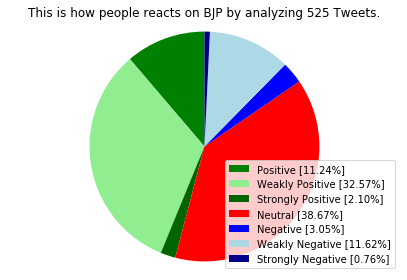

In [3]:
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()